In [1]:
Intensity vs q

SyntaxError: invalid syntax (<ipython-input-1-bcb7a49e5ce9>, line 1)

In [2]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import skbeam.core.roi as roi
import skbeam.core.correlation as corr
import skbeam.core.utils as utils
import xray_vision
import xray_vision.mpl_plotting as mpl_plot
import time

from databroker import DataBroker as db, get_table
from csxtools.utils import get_fastccd_images, get_images_to_3D, get_images_to_4D, fccd_mask, get_fastccd_flatfield
from csxtools.image import stackmean, images_mean, images_sum
from csxtools.ipynb import image_stack_to_movie, show_image_stack
from matplotlib.colors import LogNorm
from skbeam.core import recip
from skbeam.core. utils import grid3d
from scipy.signal import savgol_filter as sgf
from matplotlib import colors
from ipywidgets import interact


ModuleNotFoundError: No module named 'skbeam'

In [ ]:
#for 4 picture frame

#634 ev, 80 K  -1st cycle
light = db[118555]
dark0 = db[118556]
dark1 = db[118557]
dark2 = db[118558]

#634 ev, 80 K  -2nd cycle
light = db[118616]
dark0 = db[118617]
dark1 = db[118618]
dark2 = db[118619]






In [3]:
#on resonance
light_1 = db[123134]
dark0_1 = db[123131]
dark1_1 = db[123132]
dark2_1 = db[123133]


#off resonance
light_2 = db[123033]
dark0_2 = db[123034]
dark1_2 = db[123035]
dark2_2 = db[123036]



images1 = get_fastccd_images(light_1, (dark0_1, dark1_1, dark2_1), flat=None)
stack1 = get_images_to_3D(images1)

images2 = get_fastccd_images(light_2, (dark0_2, dark1_2, dark2_2), flat=None)
stack2 = get_images_to_3D(images2)

mean_stack_1 = stackmean(stack1)
mean_stack_2= stackmean(stack2)



NameError: name 'db' is not defined

In [4]:
print(mean_stack_1[450,1])
print(np.sum(mean_stack_1))

NameError: name 'mean_stack_1' is not defined

In [5]:

I=[]
for i in range(1,1000):
    j=mean_stack_1[450,i]
    I.append(j)
    
    
J=[]
for j in range(1,1000):
    y=mean_stack_2[450,j]
    J.append(y)
    
    
print(len(I))
print(len(J))

999
999


In [6]:

I_sum = []
J_sum = []
for i in range(100):
    roi_edge= (10*i,10*i+10)
    label_array = roi.rings(roi_edge, (450,1050), shape=mean_stack_1.shape)
    I = mean_stack_1*label_array
    J = mean_stack_2*label_array
    x=np.count_nonzero(label_array)
    y=np.count_nonzero(label_array)
    I_sum.append((np.sum(I)/x))
    J_sum.append((np.sum(J)/y))
print(I_sum)


                       

/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


[nan, nan, nan, nan, nan, 2691.8753735495375, 1624.1661742774081, 994.6217852923526, 585.2692034724116, 373.0959339367966, 256.1236219900095, 200.44718620480614, 162.8755852209018, 139.4792851716196, 121.37730419013629, 118.01472939823772, 112.02867756401994, 111.44239043528414, 108.97066567048225, 106.41154684641126, 112.74989918918595, 110.70879393222768, 115.37231715963578, 116.8090783191222, 127.53731043830152, 125.23434408715931, 128.01570449541063, 130.6974017112081, 130.40438355150667, 133.3704293337611, 139.5369061488425, 133.8148021830156, 137.51081288681357, 137.53723520387692, 141.03338761569978, 138.10423034459512, 139.39811575424412, 138.39694029568074, 135.0878550960729, 135.93642507561086, 134.44738175672518, 135.6274318007001, 126.94326319726899, 124.6395179878898, 122.97644990327886, 120.83267792358471, 118.14549742609445, 115.17662940617444, 112.26414015607229, 109.06546455654448, 103.32170246745986, 100.46640485430373, 97.65525189948846, 91.58713639153622, 75.4678291

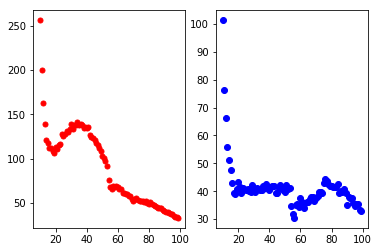

In [7]:
%matplotlib inline
y1=I_sum[10:]
y2=J_sum[10:]
x=range(10,100)
fig, ax =plt.subplots(1,2)
ax[0].plot(x,y1,'o', markersize=5, color='r')
ax[1].plot(x, y2, 'o', color='blue')

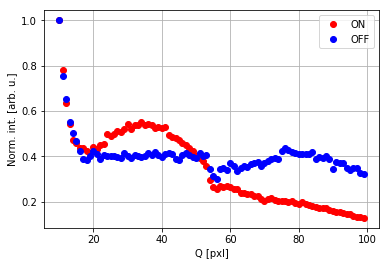

In [8]:
%matplotlib inline
x=range(10,100)
y1=I_sum[10:]
y2=J_sum[10:]

fig, ax= plt.subplots()
ax.plot(x, y1/np.max(y1), 'o', color='red', label='ON')
ax.plot(x, y2/np.max(y2), 'o', color='blue',label='OFF')
ax.legend()
ax.grid()
ax.set_xlabel('Q [pxl]');
ax.set_ylabel('Norm. int. [arb. u.]');